In [2]:
from sklearn.naive_bayes import GaussianNB

In [3]:
gnb = GaussianNB()

In [4]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X,Y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0)

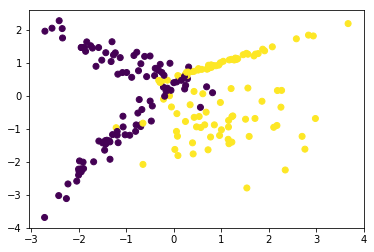

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

## Train the classifier

In [7]:
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
gnb.score(X,Y)

0.875

In [9]:
# Score manually
pred = gnb.predict(X)
acc = (sum(pred==Y))/Y.shape[0]
print(acc)

0.875


In [10]:
print(pred)

[0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1]


## Generate Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

In [14]:
cnf_matrix = confusion_matrix(Y,pred)
print(cnf_matrix)

[[83 15]
 [10 92]]


## Visualize Confusion Matrix

In [27]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

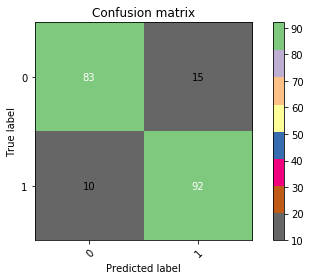

In [29]:
plot_confusion_matrix(Y, pred, [0,1], cmap=plt.cm.Accent_r)